# Predicting heart disease using machine learning

    This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.
    
    We're going to take the following approach:
    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling 
    6. Experimentation
## 1. Problem Definition
Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleveland data from the UCI machine learning repository.

There are also a version of it available on Kaggle.


## 3. Evaluation

> If we can reach 95% at predicting wheter or not a patient has heart disease during the proof of concept we'll pursue the project.

## 4. Features

This is where you'll different information about each of the features in your data.

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6.  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) 
    *colored by flourosopy colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14.  target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing the tools 

We're going to use Pandas, Matplotlib, and NumPy for data analysis and manipulation

In [124]:
# import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we want the plots inside the notebook
%matplotlib inline 

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# model evaluation

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix



# Load Data

In [6]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploratory (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about of them?
5. How can you add, change or remove features to get more out your data?

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

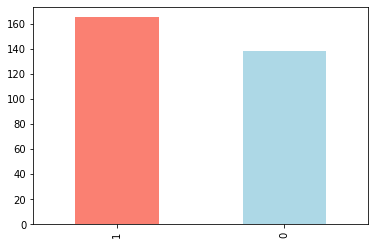

In [11]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to SEX

In [17]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [24]:
# Compare target column with sex column
crosstab_target_sex = pd.crosstab(df['target'], df['sex'])
crosstab_target_sex

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

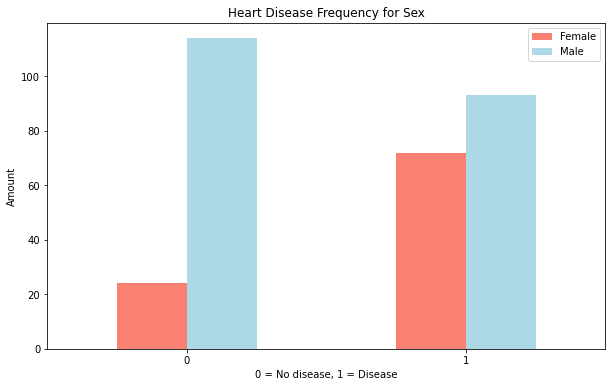

In [36]:
# Create a plot of crosstab
crosstab_target_sex.plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

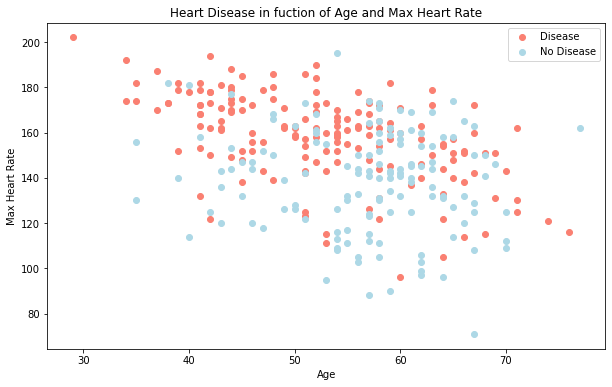

In [55]:
# Create anothre figure
plt.figure(figsize=(10,6))
# Scatter with positive examples

plt.scatter(df['age'][df.target == 1], df['thalach'][df['target'] == 1], c='salmon')

# Scatter with negative examples
plt.scatter(df['age'][df.target == 0], df['thalach'][df['target'] == 0], c='lightblue')

# Add some hepful info

plt.title('Heart Disease in fuction of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

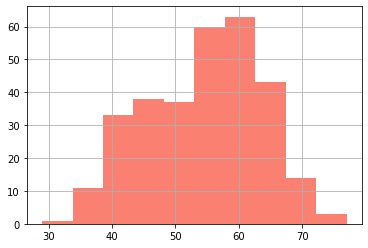

In [56]:
# Check the distribution of the age column with a histogram
df['age'].hist(color='salmon');

### Heart Disease Frequency per chest pain type 
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [69]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

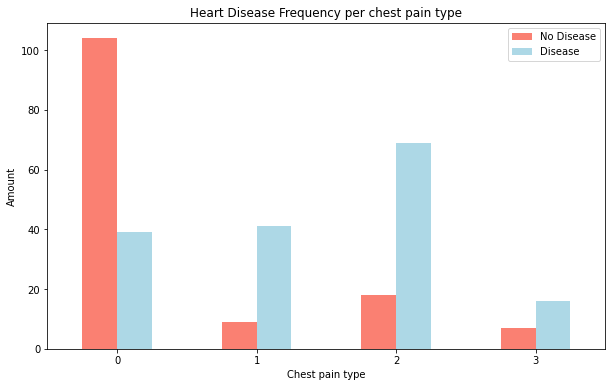

In [67]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10,6))
plt.title('Heart Disease Frequency per chest pain type')
# plt.xlabel('0: Typical angina: chest pain related decrease blood supply to the heart, 1: Atypical angina: chest pain not related to heart, 2: Non-anginal pain: typically esophageal spasms (non heart related), 3: Asymptomatic: chest pain not showing signs of disease')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
# Make a correlation metrics
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


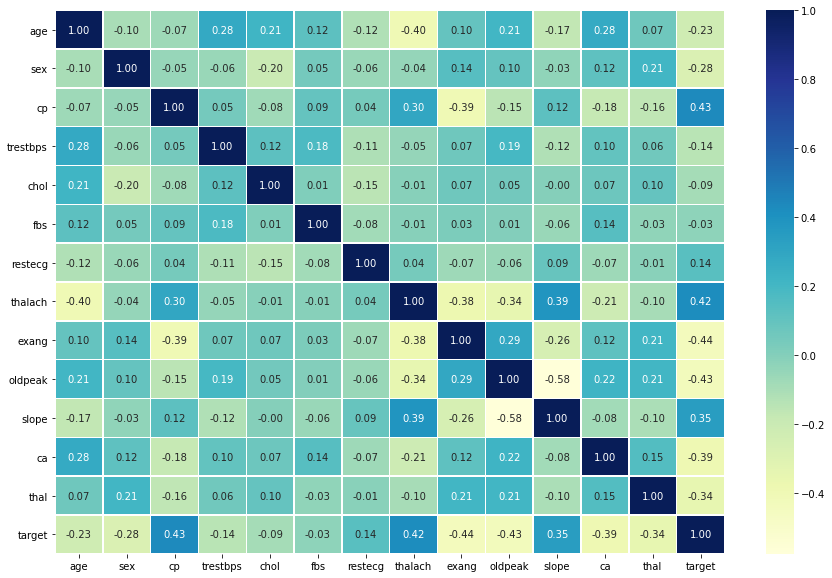

In [74]:
# Lets make our correlation matrix a little prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

## 5. Modelling 

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
# Split data into X & y
X = df.drop('target', axis=1)

y = df['target']




In [77]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [78]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [80]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)



Now we've got our data split into training and test sets. it's time tu build a machine learning model.

We'll train it (find patterns) on the training sets.

and we'll test it (use the patterns) on the test set.

1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [87]:
# put models in a dict

models =  {
    'Logistic Regression' : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    'Random forest' : RandomForestClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train: traning data (no labels)
    y_traing : traning data (labels)
    X_test: test data (no labels),
    y_test: test data (labels)
    
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        score = model.score(X_test, y_test)
        model_scores[name] = score
    return model_scores


In [89]:
models_score = fit_and_score(models, X_train, y_train, X_test, y_test)
models_score

D:\Learning\ml\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

### model comparison 

<AxesSubplot:>

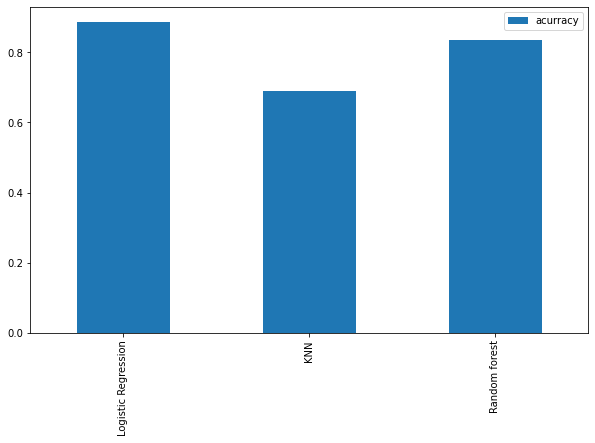

In [93]:
model_compare = pd.DataFrame(models_score , index = ['acurracy'])
model_compare.T.plot.bar(figsize=(10,6))

Now we've got a baseline model... and we know a model's first predictions  aren't always what we should based our next steps off. What should do?
Let's look at the following 
* hyperparameters tunning 
* Feature importance 
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

    ## Hyperparameter tunning


In [95]:
train_scores = []
test_scores = []

# create a list of different values 
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit algorithm 
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))
    

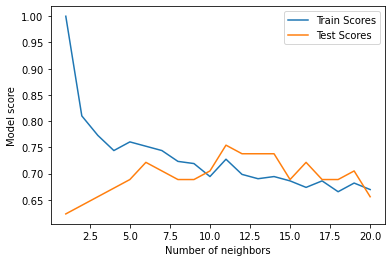

In [97]:
plt.plot(neighbors, train_scores,label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

## hyperparameter tunning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()



In [104]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    
}

rf_grid = {
    'n_estimators' : np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5 ,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1, 20 ,2)
}

In [100]:
# Tune Logistic Regression

np.random.seed(42)

rs_log_res = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)



rs_log_res.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [101]:
rs_log_res.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [102]:
rs_log_res.score(X_test, y_test)

0.8852459016393442

## RandomForestClassifier

In [105]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)



rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [108]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [107]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [109]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

1. By Hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter Tuning with GridSearchCV
Since our LogisticRegresion model provides the best scores so far, We'll try and improve them again using GridSearchCV

In [114]:
# Different Hyperparameters for our Logistic Regression model
np.random.seed(42)
log_reg_grid = {
    'C' : np.logspace(-4, 4, 20), 
    'solver' : ['liblinear']
} 

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)


gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [116]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [115]:

gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluation our tuned machine learning classifier, beyond accuracy
* ROC cuerve and AUC score
* Confusion matrix
* Classification report
* Precision 
* Recall 
* F1-score

... and would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model first we need to make predictions


In [118]:
y_preds = gs_log_reg.predict(X_test)

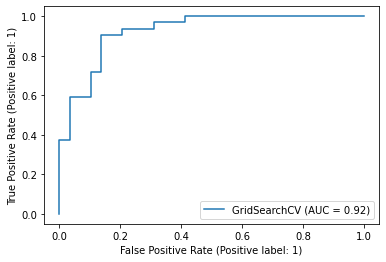

In [123]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [129]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

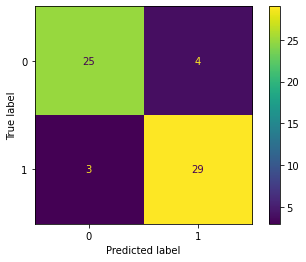

In [128]:
plot_confusion_matrix(gs_log_reg,X_test, y_test);

In [132]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross validation
we're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [133]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [134]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')


In [137]:
# accuracy
cv_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

In [136]:
cv_precision = np.mean(cross_val_score(clf, X, y, cv=5, scoring='precision'))

In [135]:
cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring='recall'))

In [138]:
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring='f1'))

In [140]:
## visualize cross validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy' : cv_acc,
    "Precision": cv_precision,
    'Recall' : cv_recall,
    'F1' : cv_f1
}, index=[0])

In [141]:
cv_metrics.head()

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


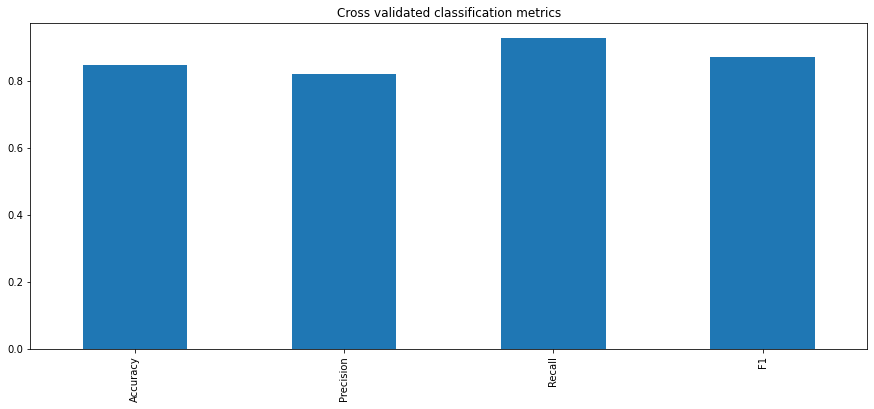

In [145]:
cv_metrics.T.plot.bar(title='Cross validated classification metrics', legend=False, figsize=(15,6) );

### Feature importance

Feature important is another as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'


Fiding feature importance is different for each machine learning model.

Let's find for our LogisticRegression model

In [149]:
#fit 
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [150]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [151]:
# Check coef-
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [154]:
# 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [155]:
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

<AxesSubplot:title={'center':'Feature Importance'}>

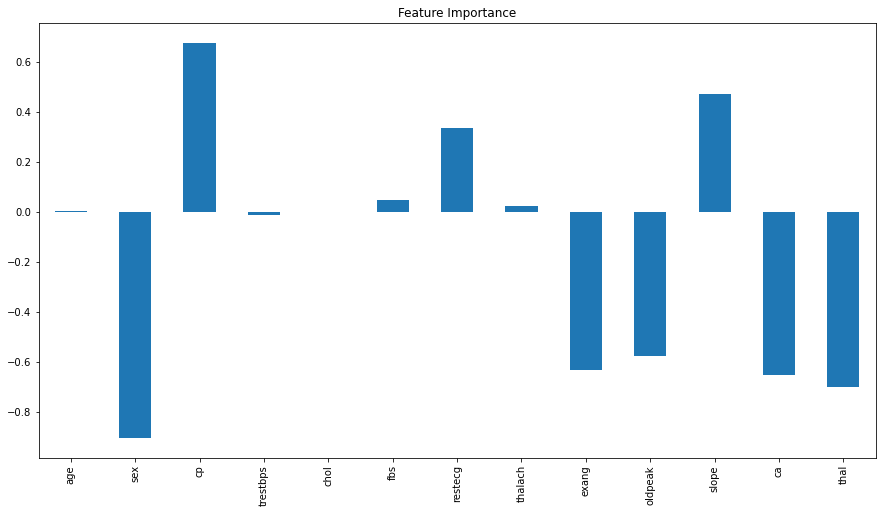

In [158]:
#Visualize 
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance', legend=False, figsize=(15,8))

# 6. Experimentation 

If you haven't hit your evaluation metric yet.. ask yourself..

* Could you collect more data? 
* Could you try a better model CatBoost or XGBoost
* Could you improve the current models? (beyond what we've done so far)
* if your model is good enough (you have hit your evaluation metric how would you export it and share it with others)